In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import  Lambda
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.losses import Huber

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/csh101/csh101.ann.features.csv')


labels = data['activity'].replace(['Step_Out', 'Other_Activity', 'Toilet', 'Phone',
       'Personal_Hygiene', 'Leave_Home', 'Enter_Home', 'Relax',
       'Sleep_Out_Of_Bed', 'Drink', 'Watch_TV', 'Dress', 'Evening_Meds',
       'Wake_Up', 'Read', 'Morning_Meds', 'Cook_Breakfast',
       'Eat_Breakfast', 'Bathe', 'Cook_Lunch', 'Eat_Lunch',
       'Wash_Lunch_Dishes', 'Go_To_Sleep', 'Sleep',
       'Bed_Toilet_Transition', 'Wash_Breakfast_Dishes', 'Work_At_Table',
       'Groom', 'Cook', 'Eat', 'Cook_Dinner', 'Eat_Dinner',
       'Wash_Dinner_Dishes', 'Wash_Dishes', 'Entertain_Guests'],[x for x in range(35)])

data=data.iloc[:, 0:-1].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)


X = []
y = []
for i in range(60, 241071):
    X.append(data[i-60:i, :])
    y.append(labels[i])
X, y = np.array(X), to_categorical(np.array(y))
np.shape(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 36))


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=1)


X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

adm=Adam(learning_rate=0.002,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
model = Sequential()

model.add(Conv1D(64, kernel_size=5, activation='relu', padding='same',
                 input_shape= (X_train.shape[1], 36)))

model.add(Conv1D(64, kernel_size=5, activation='relu', padding='same'))



model.add(LSTM(200, dropout=0.05, recurrent_dropout=0.01, return_sequences= True))
model.add(LSTM(200, dropout=0.05, recurrent_dropout=0.01))


#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='sigmoid'))
#model.add(Dropout(0.25))
#model.add(Dense(512, activation='sigmoid'))
#model.add(Dropout(0.25))

model.add(Dense(35, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 64)            11584     
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 64)            20544     
                                                                 
 lstm (LSTM)                 (None, 60, 200)           212000    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 35)                7035      
                                                                 
Total params: 571,963
Trainable params: 571,963
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_history = model.fit(X_train, y_train, batch_size=256,  epochs=12, validation_data=(X_val, y_val))

Epoch 1/12
530/530 [==============================] - 534s 977ms/step - loss: 1.1709 - accuracy: 0.6258 - val_loss: 0.9741 - val_accuracy: 0.6735
Epoch 2/12
530/530 [==============================] - 519s 979ms/step - loss: 0.8156 - accuracy: 0.7189 - val_loss: 0.7570 - val_accuracy: 0.7387
Epoch 3/12
530/530 [==============================] - 521s 983ms/step - loss: 0.7052 - accuracy: 0.7510 - val_loss: 0.7096 - val_accuracy: 0.7528
Epoch 4/12
530/530 [==============================] - 509s 960ms/step - loss: 0.6538 - accuracy: 0.7701 - val_loss: 0.5925 - val_accuracy: 0.7897
Epoch 5/12
530/530 [==============================] - 505s 954ms/step - loss: 0.6026 - accuracy: 0.7883 - val_loss: 0.6060 - val_accuracy: 0.7832
Epoch 6/12
530/530 [==============================] - 506s 955ms/step - loss: 0.5279 - accuracy: 0.8146 - val_loss: 0.5246 - val_accuracy: 0.8182
Epoch 7/12
530/530 [==============================] - 507s 957ms/step - loss: 0.4439 - accuracy: 0.8453 - val_loss: 0.4857 -

<Figure size 432x288 with 0 Axes>

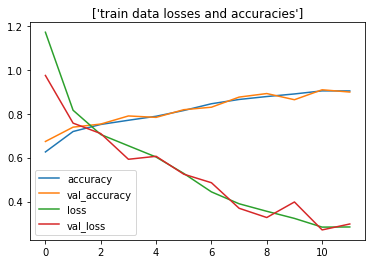

<Figure size 432x288 with 0 Axes>

In [ ]:
history = network_history.history


losses = history['loss']
val_losses = history['val_loss']
accuracies = history['accuracy']
val_accuracies = history['val_accuracy']

plt.xlabel = ('epochs')
plt.ylabel = ('accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.title(['train data losses and accuracies'])
plt.figure()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


print('test_loss =',test_loss)
print('test_accuracy =',test_accuracy)